# NLP Regression  
This is just a simple experiment with NLP and to get low MRRMSE(Mean Rowwise Root Mean Sqared Error)

We're going to use SMILES embedding.

Steps to do above:
1. Preprocess the data 
2. Make a TextVectorizer and embedding
3. Build a Model
4. Visualize, Evaluate and Repeat 

Let's go...


In [6]:
!pip3 install tensorflow numpy matplotlib pandas

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/3e/3c/81364f19d2f9abbd46f0fb9a4dbac2c6fa2dd0376ebf9cdfa


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\sarah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data

In [9]:
!pip3 install fastparquet

  Obtaining dependency information for fastparquet from https://files.pythonhosted.org/packages/e0/e3/148ff9c95c72d3cdca00f33fd00b0ca4118fbcfce1880395f86b1902a4f6/fastparquet-2023.10.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cramjam>=2.3 from https://files.pythonhosted.org/packages/69/e5/261a0baa524bf9e5c1e7a62e33ad8ccc0a9c40ccc6ac1c323f9ded203cf4/cramjam-2.7.0-cp311-none-win_amd64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e8/f6/3eccfb530aac90ad1301c582da228e4763f19e719ac8200752a4841b0b2d/fsspec-2023.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/667.9 kB ? eta -:--:--
    --------------------------------------- 10.2/667.9 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/667.9 kB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 522.2/667.9 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 667.9/667.9 kB 6.0 MB


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\sarah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
data = pd.read_parquet("de_train.parquet")
id_map = pd.read_csv("id_map.csv")
sample_submission = pd.read_csv("sample_submission.csv")
RNDST1=271828
RNDST2=314159

 **🔑Tip:** Stare at the data for a while to get some insights and ideas to run experiments.

In [ ]:
data.head(20)

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,0.0,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,0.0,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,0.0,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,0.0,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,0.0,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
5,T cells CD4+,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,0.0,0.618061,0.180148,0.590015,0.035658,0.034297,...,-1.002997,0.177514,0.591768,-0.412400,-0.011633,-0.044739,0.213627,0.186406,-1.459477,1.164084
6,T cells CD8+,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,0.0,-0.148131,0.091336,-0.097212,1.225601,0.045787,...,-0.228645,0.091248,-0.581765,0.405682,-0.034414,0.296333,0.170313,0.332022,-0.532363,0.134475
7,T regulatory cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,0.0,0.561473,0.149415,3.224920,3.517419,1.361175,...,-0.156127,0.766118,0.702836,0.949482,0.757482,1.163063,1.532419,-0.399292,-2.412165,0.478977
8,B cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,0.0,0.394173,-0.153824,0.178232,0.566241,0.391377,...,-1.052302,-1.176587,-1.220291,-0.278944,-0.095066,1.101790,0.061803,1.406335,-0.264996,-0.119743
9,Myeloid cells,Idelalisib,LSM-1205,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,0.0,0.025146,0.316388,1.366885,1.301593,2.317619,...,-0.902546,-1.445523,0.794772,0.428973,0.605834,0.271988,0.492231,0.354721,1.471559,-0.259483


# Aux functions 

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

def create_model_checkpoint(filepath, monitor='val_mae', save_best_only=True,
                            save_weights_only=True, mode='auto', verbose=0):
    """
    Create a ModelCheckpoint callback for saving the best model weights during training.

    Args:
        filepath (str): Filepath to save the best weights.
        monitor (str): Metric to monitor (e.g., 'val_loss' or 'val_mae').
        save_best_only (bool): Save only the best weights.
        save_weights_only (bool): Save only the model's weights, not the entire model.
        mode (str): One of {'auto', 'min', 'max'}. In 'min' mode, it saves when the monitored metric decreases.
        verbose (int): Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

    Returns:
        keras.callbacks.ModelCheckpoint: ModelCheckpoint callback.
    """
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor=monitor,
        save_best_only=save_best_only,
        save_weights_only=save_weights_only,
        mode=mode,
        verbose=verbose
    )
    return checkpoint


In [5]:
def plot_training_history(history, metrics):
    """
    Plot training history curves for loss and evaluation metrics on the same line.

    Args:
        history (keras.callbacks.History): Training history object.
        metrics (list): List of metric names to plot.

    Returns:
        None
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color="blue")
    plt.plot(epochs, val_loss, label='Validation Loss', color="red")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot specified evaluation metrics on the same line
    for metric in metrics:
        train_metric_name = f'Training {metric.capitalize()}'
        val_metric_name = f'Validation {metric.capitalize()}'
        train_metric = history.history[metric]
        val_metric = history.history['val_' + metric]

        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_metric, label=train_metric_name, color="green")
        plt.plot(epochs, val_metric, label=val_metric_name, color="orange")

    plt.title('Metrics')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [6]:
def add_columns(data, id_map):
    sm_name_to_smiles = data.set_index('sm_name')['SMILES'].to_dict()
    sm_lincs_id = data.set_index('sm_name')["sm_lincs_id"].to_dict()

    id_map['SMILES'] = id_map['sm_name'].map(sm_name_to_smiles)
    id_map['sm_lincs_id'] = id_map['sm_name'].map(sm_lincs_id)

    return id_map

In [20]:
!pip3 install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.w


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\sarah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
from sklearn.metrics import mean_absolute_error

def calculate_mae_and_mrrmse(model, data, y_true, scaler=None):
    """
    Calculate Mean Absolute Error (MAE) and Mean Rowwise Root Mean Squared Error (MRRMSE).

    Parameters:
    - model: The trained  model.
    - data: The input data for prediction.
    - y_true: The true target values.
    - scaler: The scaler used for data normalization.

    Returns:
    - None
    """
    # Predict using the model
    y_pred_original = model.predict(data, batch_size=1)

    if scaler:
        
        y_pred = scaler.inverse_transform(y_pred_original)
        y_true = scaler.inverse_transform(y_true)
        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_true , y_pred)

        # Calculate Mean Rowwise Root Mean Squared Error (MRRMSE)
        rowwise_rmse = np.sqrt(np.mean(np.square(y_true - y_pred), axis=1))
        mrrmse_score = np.mean(rowwise_rmse)
    else:
       # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_true , y_pred_original)

        # Calculate Mean Rowwise Root Mean Squared Error (MRRMSE)
        rowwise_rmse = np.sqrt(np.mean(np.square(y_true - y_pred_original), axis=1))
        mrrmse_score = np.mean(rowwise_rmse)
    # Print the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Rowwise Root Mean Squared Error (MRRMSE): {mrrmse_score}")

In [8]:
from sklearn.model_selection import KFold

def k_fold_valid(model, features_list=[],full_labels=None , num_folds=7, random_state=RNDST1, scaler=None):
    # Initialize lists to store the model's performance scores
        mae_scores = []
        mrrmse_scores = []

        # Initialize the KFold object
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

        # Loop through the K folds
        for train_index, val_index in kf.split(full_labels):
        # Convert indices to integers and split the data
            train_index = train_index.astype(int)
            val_index = val_index.astype(int)

            X_train_list = [features[train_index] for features in features_list]
            X_val_list = [features[val_index] for features in features_list]
            y_train_ = full_labels[train_index]
            y_val_ = full_labels[val_index]

            # Train your model on X_train_list and y_train_
            # Example: model.fit(X_train_list, y_train_, epochs=20, verbose=0)

            # Make predictions on the validation set
            y_pred = model.predict(X_val_list, batch_size=1)

            if scaler:
                # Inverse transform predictions and true labels
                y_pred = scaler.inverse_transform(y_pred)
                y_val_ = scaler.inverse_transform(y_val_)

        # Calculate the Mean Absolute Error (MAE)
            mae = mean_absolute_error(y_val_, y_pred)
            mae_scores.append(mae)

        # Calculate the Mean Rowwise Root Mean Squared Error (MRRMSE)
            rowwise_rmse = np.sqrt(np.mean(np.square(y_val_ - y_pred), axis=1))
            mrrmse_score = np.mean(rowwise_rmse)
            mrrmse_scores.append(mrrmse_score)
        # Calculate the mean of MAE and MRRMSE scores
            mean_mae = np.mean(mae_scores)
            mean_mrrmse = np.mean(mrrmse_scores)

        # Usage example:
        print(f'Average MAE across {num_folds} folds: {mean_mae:.4f} ')
        print(f'Average MRRMSE across {num_folds} folds: {mean_mrrmse:.4f}')

# Preprocessing data 

In [9]:
# Shuffle data because we use full features for final training 
data = data.sample(frac=1.0, random_state=RNDST2)

In [10]:
add_columns(data, id_map)

,id,cell_type,sm_name,SMILES,sm_lincs_id
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...,Cc1nc2c(-c3cnc(N)nc3)nc(N3CCOCC3)nc2n1C(C)C,LSM-47134
1,1,B cells,ABT-199 (GDC-0199),CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LSM-45468
2,2,B cells,ABT737,CN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=O)...,LSM-1180
3,3,B cells,AMD-070 (hydrochloride),NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21,LSM-45591
4,4,B cells,AT 7867,Clc1ccc(C2(c3ccc(-c4cn[nH]c4)cc3)CCNCC2)cc1,LSM-1155
...,...,...,...,...,...
250,250,Myeloid cells,Vandetanib,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,LSM-1199
251,251,Myeloid cells,Vanoxerine,Fc1ccc(C(OCCN2CCN(CCCc3ccccc3)CC2)c2ccc(F)cc2)cc1,LSM-2703
252,252,Myeloid cells,Vardenafil,CCCc1nc(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CC...,LSM-2292
253,253,Myeloid cells,Vorinostat,O=C(CCCCCCC(=O)Nc1ccccc1)NO,LSM-3828


In [11]:
cell_type_feature = pd.DataFrame(data["cell_type"], columns=["cell_type"])
smiles_feature = pd.DataFrame(data["SMILES"], columns=["SMILES"])
labels = data.drop(["cell_type","sm_name","sm_lincs_id","SMILES","control"], axis=1)

# for test
test_feature_smiles = pd.DataFrame(id_map["SMILES"], columns=["SMILES"])
test_feature_cell_type = pd.DataFrame(id_map["cell_type"], columns=["cell_type"])

In [12]:
cell_type_feature.head()

,cell_type
275,B cells
97,T cells CD4+
446,T regulatory cells
405,NK cells
172,T cells CD8+


In [13]:
smiles_feature.head()

,SMILES
275,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO
97,CC(=O)c1c(C)c2cnc(Nc3ccc(N4CCNCC4)cn3)nc2n(C2C...
446,C=C[C@@]1(C)CC(=O)[C@]2(O)[C@@]3(C)[C@@H](O)CC...
405,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
172,Nc1nc(Nc2ccc3c(c2)CC[C@@H](N2CCCC2)CC3)nn1-c1c...


In [14]:
test_feature_cell_type.head()

,cell_type
0,B cells
1,B cells
2,B cells
3,B cells
4,B cells


In [15]:
test_feature_smiles.head()

,SMILES
0,Cc1nc2c(-c3cnc(N)nc3)nc(N3CCOCC3)nc2n1C(C)C
1,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
2,CN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=O)...
3,NCCCCN(Cc1nc2ccccc2[nH]1)[C@H]1CCCc2cccnc21
4,Clc1ccc(C2(c3ccc(-c4cn[nH]c4)cc3)CCNCC2)cc1


In [16]:
labels.head()

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
275,2.225073,0.564347,-0.437639,-0.415907,0.307772,-0.854733,0.004427,-0.188152,7.256838,2.342028,...,10.803264,3.292811,-0.051246,0.247855,-1.651776,-1.788311,-0.418805,3.396236,-0.567121,0.501423
97,-0.385500,0.224247,0.117304,0.238819,-1.386863,-0.063416,0.920370,0.570935,-0.189405,1.411663,...,0.035018,0.123359,-0.109634,0.539038,-0.529339,0.207284,0.334220,-0.165569,-0.084901,0.459351
446,0.274229,0.216127,0.015571,0.265780,0.114659,0.095823,-0.111098,-0.341972,-0.124031,1.720857,...,0.724063,-0.389746,-0.715573,0.455230,-0.091439,0.711671,0.256532,-0.012416,0.362140,-0.107835
405,0.017410,-1.507421,0.596213,1.029487,-0.007645,0.131715,-0.364590,0.119759,-0.116446,0.164437,...,-0.031208,0.490012,0.055683,0.426018,-0.232951,0.371199,0.680978,0.181810,-0.663233,0.065054
172,-0.719710,-0.258620,-0.594137,-0.774640,-0.779235,-1.906246,-0.253530,-0.049453,-1.876689,0.545112,...,-0.558819,-0.645692,-1.357651,-2.938058,-0.233343,-0.720959,0.137504,-0.940581,-0.402748,1.138818


In [17]:
# Normalize labels
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_label = scaler.fit_transform(labels)

In [18]:
# Onehotencode
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
one_hot_celltype = encoder.fit_transform(cell_type_feature)
one_hot_test_cell_type = encoder.transform(test_feature_cell_type)

In [19]:
from sklearn.model_selection import train_test_split

train_cell_type, temp_cell_type, train_labels, temp_labels = train_test_split(one_hot_celltype.toarray(),
                                                                            norm_label,
                                                                            test_size=0.3, random_state=RNDST2)

val_cell_type, test_cell_type, val_labels , test_labels = train_test_split(temp_cell_type, temp_cell_type, test_size=0.6, random_state=RNDST2)

In [20]:
train_smiles, temp_smiles, train_labels, temp_labels = train_test_split(smiles_feature["SMILES"].to_numpy(),
                                                                            norm_label,
                                                                            test_size=0.3, random_state=RNDST2)

val_smiles, test_smiles, val_labels , test_labels = train_test_split(temp_smiles, temp_labels, test_size=0.6, random_state=RNDST2)


In [21]:
full_smiles = smiles_feature["SMILES"].values 
full_cell_type = one_hot_celltype.toarray()
full_labels = norm_label

In [22]:
final_test_smiles = test_feature_smiles["SMILES"].values
final_cell_type = one_hot_test_cell_type.toarray()

In [23]:
full_smiles[:3]

array(['O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO',
       'CC(=O)c1c(C)c2cnc(Nc3ccc(N4CCNCC4)cn3)nc2n(C2CCCC2)c1=O',
       'C=C[C@@]1(C)CC(=O)[C@]2(O)[C@@]3(C)[C@@H](O)CCC(C)(C)[C@@H]3[C@H](O)[C@H](OC(C)=O)[C@@]2(C)O1'],
      dtype=object)

In [24]:
full_cell_type

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [25]:
final_cell_type

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [26]:
final_test_smiles[:3]

array(['Cc1nc2c(-c3cnc(N)nc3)nc(N3CCOCC3)nc2n1C(C)C',
       'CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NCC5CCOCC5)c([N+](=O)[O-])c4)c(Oc4cnc5[nH]ccc5c4)c3)CC2)=C(c2ccc(Cl)cc2)C1',
       'CN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=O)c2ccc(N3CCN(Cc4ccccc4-c4ccc(Cl)cc4)CC3)cc2)cc1[N+](=O)[O-]'],
      dtype=object)

In [27]:
train_smiles[:10]

array(['Nc1nc(Nc2ccc3c(c2)CC[C@@H](N2CCCC2)CC3)nn1-c1cc2c(nn1)-c1ccccc1CCC2',
       'CC(C)C[C@@H](C(=O)N[C@H](C(=O)OC1CCCC1)c1ccccc1)[C@H](O)C(=O)NO',
       'COc1cccc(Nc2c(C(N)=O)cnc3c(C)cc(S(=O)(=O)c4cccc(C(=O)N(C)C)c4)cc23)c1',
       'COc1cc(-c2cc(-c3cccc(O)c3)cnc2N)cc(OC)c1OC',
       'Nc1ncnc2c1c(I)cn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
       'CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)c3ccccc3n1)c(=O)n2C',
       'C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C@@]2(C)[C@H]1CC[C@]2(O)C(=O)CO',
       'O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2n1)C1CC1',
       'NC(O)=NO',
       'CCCc1nc(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)nn12'],
      dtype=object)

In [28]:
# Check the lengths
len(train_smiles), len(train_smiles), len(val_smiles), len(val_smiles), len(test_smiles), len(test_smiles)

(429, 429, 74, 74, 111, 111)

# Split chars 
We will split the `SMILES` into chars and then vectorize.

In [29]:
# Function to split sentences into characters
def split_chars(text):
    return " ".join(list(text))

In [30]:
sample = "CC(C)c1cc(C(=O)N2Cc3ccc(CN4CCN(C)CC4)cc3C2)c(O)cc1O"
split_chars(sample)

'C C ( C ) c 1 c c ( C ( = O ) N 2 C c 3 c c c ( C N 4 C C N ( C ) C C 4 ) c c 3 C 2 ) c ( O ) c c 1 O'

Split the smiles

In [31]:
train_char_smiles = [split_chars(feature) for feature in train_smiles]
val_char_smiles = [split_chars(feature) for feature in val_smiles]
test_char_smiles = [split_chars(feature) for feature in test_smiles]

In [32]:
# For final training
full_train_smiles = [split_chars(feature) for feature in full_smiles]

In [33]:
# For prediction
final_test_smiles = [split_chars(feature) for feature in final_test_smiles]

In [34]:
full_train_smiles[:3] 

['O = C ( / C = C / c 1 c c c c ( S ( = O ) ( = O ) N c 2 c c c c c 2 ) c 1 ) N O',
 'C C ( = O ) c 1 c ( C ) c 2 c n c ( N c 3 c c c ( N 4 C C N C C 4 ) c n 3 ) n c 2 n ( C 2 C C C C 2 ) c 1 = O',
 'C = C [ C @ @ ] 1 ( C ) C C ( = O ) [ C @ ] 2 ( O ) [ C @ @ ] 3 ( C ) [ C @ @ H ] ( O ) C C C ( C ) ( C ) [ C @ @ H ] 3 [ C @ H ] ( O ) [ C @ H ] ( O C ( C ) = O ) [ C @ @ ] 2 ( C ) O 1']

In [35]:
final_test_smiles[:3]

['C c 1 n c 2 c ( - c 3 c n c ( N ) n c 3 ) n c ( N 3 C C O C C 3 ) n c 2 n 1 C ( C ) C',
 'C C 1 ( C ) C C C ( C N 2 C C N ( c 3 c c c ( C ( = O ) N S ( = O ) ( = O ) c 4 c c c ( N C C 5 C C O C C 5 ) c ( [ N + ] ( = O ) [ O - ] ) c 4 ) c ( O c 4 c n c 5 [ n H ] c c c 5 c 4 ) c 3 ) C C 2 ) = C ( c 2 c c c ( C l ) c c 2 ) C 1',
 'C N ( C ) C C [ C @ H ] ( C S c 1 c c c c c 1 ) N c 1 c c c ( S ( = O ) ( = O ) N C ( = O ) c 2 c c c ( N 3 C C N ( C c 4 c c c c c 4 - c 4 c c c ( C l ) c c 4 ) C C 3 ) c c 2 ) c c 1 [ N + ] ( = O ) [ O - ]']

In [36]:
train_char_smiles[:3]

['N c 1 n c ( N c 2 c c c 3 c ( c 2 ) C C [ C @ @ H ] ( N 2 C C C C 2 ) C C 3 ) n n 1 - c 1 c c 2 c ( n n 1 ) - c 1 c c c c c 1 C C C 2',
 'C C ( C ) C [ C @ @ H ] ( C ( = O ) N [ C @ H ] ( C ( = O ) O C 1 C C C C 1 ) c 1 c c c c c 1 ) [ C @ H ] ( O ) C ( = O ) N O',
 'C O c 1 c c c c ( N c 2 c ( C ( N ) = O ) c n c 3 c ( C ) c c ( S ( = O ) ( = O ) c 4 c c c c ( C ( = O ) N ( C ) C ) c 4 ) c c 2 3 ) c 1']

# Char vectorizer

In [37]:
# What's the average character length?
char_len_smiles = [len(feature) for feature in full_smiles]
mean_char_smiles = np.mean(char_len_smiles)
mean_char_smiles

57.10260586319218

In [38]:
#  Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_len_smiles, 95))
output_seq_char_len

97

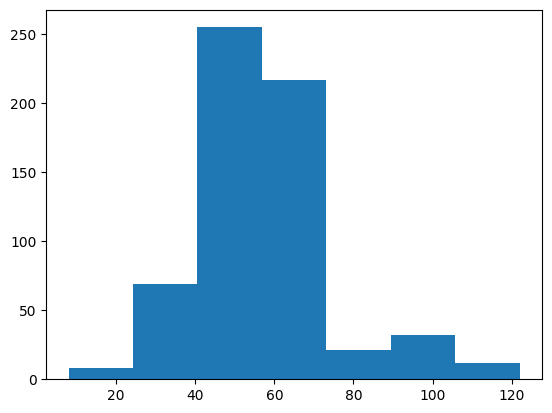

In [39]:
# Check the distribution of our sequences at character-level
plt.hist(char_len_smiles, bins=7);

Get all the unique characters in smiles

In [40]:
unique_characters = []

# Iterate over the "features" and extract unique characters
for feature in full_train_smiles:
    unique_characters.extend(set(feature))

# Remove duplicates by converting the list to a set and then back to a list
unique_characters = list(set(unique_characters))

# Print the list of unique characters
print(unique_characters)

['3', ']', '4', '6', '/', ' ', 'l', 'N', '#', 'n', ')', '1', '(', '[', 'F', 'C', 'I', 'O', '7', 'B', 'H', '-', 'c', 'o', 's', '2', '+', '\\', '=', 'S', '@', 'r', '5']


In [41]:
len(unique_characters)

33

In [42]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(unique_characters) + 2 
char_vectorizer_smiles = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize=None,
                                    split="character",
                                    name="char_vectorizer_SMILES")

# Adapt character vectorizer to training characters
char_vectorizer_smiles.adapt(train_char_smiles)

In [43]:
# Get the config of our char vectorizer
char_vectorizer_smiles.get_config()

{'name': 'char_vectorizer_SMILES',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 35,
 'standardize': None,
 'split': 'character',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 97,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 35}

In [44]:
import random

# Test out character vectorizer
random_train_feature = random.choice(train_char_smiles)
print(f"Charified text:\n{random_train_feature}")
print(f"\nLength of feature: {len(random_train_feature.split())}")
vectorized_feature = char_vectorizer_smiles([random_train_feature])
print(f"\nVectorized feature:\n{vectorized_feature}")
print(f"\nLength of vectorized feature: {len(vectorized_feature[0])}")

Charified text:
C O C ( = O ) N ( C ) c 1 c ( N ) n c ( - c 2 n n ( C c 3 c c c c c 3 F ) c 3 n c c c c 2 3 ) n c 1 N

Length of feature: 51

Vectorized feature:
[[ 4  2  8  2  4  2  6  2 12  2  8  2  5  2 11  2  6  2  4  2  5  2  3  2
   7  2  3  2  6  2 11  2  5  2 10  2  3  2  6  2 19  2  3  2  9  2 10  2
  10  2  6  2  4  2  3  2 13  2  3  2  3  2  3  2  3  2  3  2 13  2 20  2
   5  2  3  2 13  2 10  2  3  2  3  2  3  2  3  2  9  2 13  2  5  2 10  2
   3]]

Length of vectorized feature: 97


You'll notice sequences with a length shorter than 193 (output_seq_char_length) get padded with zeros on the end, this ensures all sequences passed to our model are the same length.

In [45]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer_smiles.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 35
5 most common characters: ['', '[UNK]', ' ', 'c', 'C']
5 least common characters: ['I', 'B', '\\', 'r', '7']


# Char embedding

In [46]:
# Create char embedding layer
char_embedding = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=16, # embedding dimension of each character 
                              name="char_embedding_SMILES")

In [47]:
# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_feature}\n")
char_embed_example = char_embedding(char_vectorizer_smiles([random_train_feature]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
C O C ( = O ) N ( C ) c 1 c ( N ) n c ( - c 2 n n ( C c 3 c c c c c 3 F ) c 3 n c c c c 2 3 ) n c 1 N

Embedded chars (after vectorization and embedding):
[[[-0.02104242 -0.01489706 -0.00485948 ... -0.00948647 -0.03673977
   -0.03055344]
  [ 0.01260722  0.00925357 -0.00288332 ... -0.01081953  0.04894377
    0.00427894]
  [ 0.00563632 -0.04239762 -0.03240037 ...  0.02932319  0.01235534
    0.0080024 ]
  ...
  [-0.04584758 -0.0488131  -0.0305987  ... -0.00990341  0.00842894
    0.01258102]
  [ 0.01260722  0.00925357 -0.00288332 ... -0.01081953  0.04894377
    0.00427894]
  [-0.04119396  0.01257661  0.04242721 ...  0.02719641 -0.00916834
    0.01641165]]]

Character embedding shape: (1, 97, 16)


In [48]:
# Convert list to array
train_chars = np.array(train_char_smiles)
val_chars = np.array(val_char_smiles)
test_chars = np.array(test_char_smiles)
full_train_chars = np.array(full_train_smiles)

# Building models

In [49]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM, Dense, concatenate, Conv1D, GlobalMaxPooling1D, Input, Flatten, GaussianNoise, GlobalAveragePooling1D

# Model 0 : Conv1D

In [50]:
tf.random.set_seed(RNDST2)

# Define the SMILES input
smiles_input = Input(shape=(1,), dtype="string", name="smiles_input")
char_vectors = char_vectorizer_smiles(smiles_input)
char_embeddings = char_embedding(char_vectors)
conv_layer = Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
smiles_output = GlobalMaxPooling1D()(conv_layer)

# Define the cell type input
cell_type_input = Input(shape=(6,), name="cell_type_input")
cell_type_output = Dense(32, activation="relu")(cell_type_input)

# Concatenate the two inputs
concatenated = concatenate([smiles_output, cell_type_output], name="concatenate_layer")

# Define the neural network architecture
x = Dense(128, activation="relu")(concatenated)
output = Dense(18211, activation="linear")(x)

# Create the model
model_0 = Model(inputs=[smiles_input, cell_type_input], outputs=output, name="model_0")

# Compile the model
model_0.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

In [51]:
plot_model(model_0, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [52]:
model_0_history = model_0.fit(
    x = [train_chars, train_cell_type],   
    y =train_labels,
        epochs=60,
        verbose=0,
        validation_data=([val_chars, val_cell_type], val_labels),
        callbacks=[create_model_checkpoint("model_0")])


Scores on test data:

111/111 [==============================] - 1s 5ms/step
Mean Absolute Error (MAE): 0.8498517374916851
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.3722913004125552

Scores on full data:

614/614 [==============================] - 3s 6ms/step
Mean Absolute Error (MAE): 0.7529891925806944
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.1643718084728683

Plot training and validation curves:



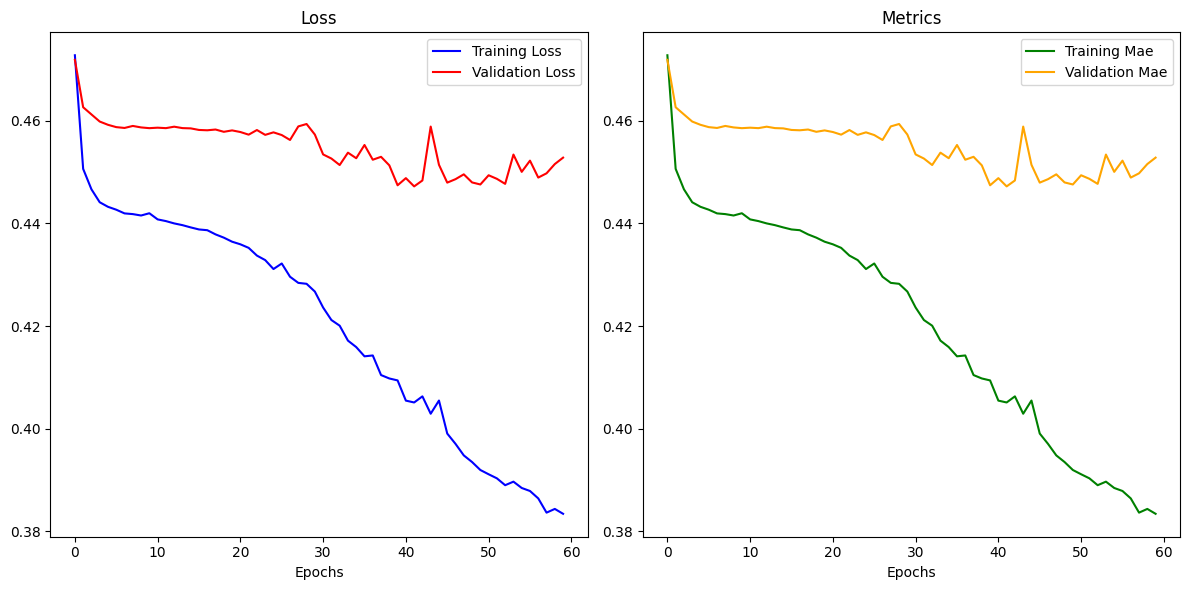

In [53]:
model_0.load_weights("model_0")
print("Scores on test data:\n")
calculate_mae_and_mrrmse(model=model_0, data=[test_chars, test_cell_type], y_true=test_labels, scaler=scaler)
print("\nScores on full data:\n")
calculate_mae_and_mrrmse(model=model_0, data=[full_train_chars, full_cell_type], y_true=full_labels, scaler=scaler)
print("\nPlot training and validation curves:\n")
plot_training_history(model_0_history , metrics=["mae"])

In [ ]:
k_fold_valid(model=model_0, features_list=[full_train_chars, np.array(full_cell_type)], full_labels=full_labels, num_folds=10, random_state=RNDST1, scaler=scaler)

# Model_1: Lstm

In [ ]:
# Embed the SMILES strings
inputs_smiles = Input(shape=(1,), dtype="string", name="smiles_input")
char_vectors = char_vectorizer_smiles(inputs_smiles)
char_embeddings = char_embedding(char_vectors)
x = LSTM(16, return_sequences=True)(char_embeddings)
x = GlobalAveragePooling1D()(x)
output_smiles = Dense(32, activation="relu")(x)

cell_type_input = tf.keras.Input(shape=(6,), dtype=tf.float32)
x = Dense(16, activation="relu")(cell_type_input)

# Concatenate the SMILES embedding and the cell type one-hot encoding
y = concatenate([output_smiles, x])
y = Dense(128, activation='relu')(y)
output_layer = Dense(18211, activation='linear')(y)

model_1 = Model(inputs=[inputs_smiles, cell_type_input], outputs=output_layer)

model_1.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),metrics=["mae"])

In [ ]:
plot_model(model_1, show_shapes=True)

In [ ]:
model_1_history = model_1.fit(x =[train_chars, train_cell_type],
                              y=train_labels,
                              epochs=100,
                              verbose=0,
                              validation_data=([val_chars, val_cell_type], val_labels),
                              callbacks=[create_model_checkpoint("model_1")])

In [ ]:
model_1.load_weights("model_1")
print("Scores on test data:\n")
calculate_mae_and_mrrmse(model=model_1, data=[test_smiles, test_cell_type], y_true=test_labels, scaler=scaler)
print("\nScores on full data:\n")
calculate_mae_and_mrrmse(model=model_1, data=[full_smiles, full_cell_type], y_true=full_labels, scaler=scaler)
print("\nPlot training and validation curves:\n")
plot_training_history(model_1_history , metrics=["mae"])

In [ ]:
k_fold_valid(model=model_1, features_list=[full_train_chars, np.array(full_cell_type)], full_labels=full_labels, num_folds=10, random_state=RNDST1, scaler=scaler)

# Model 2: Custom neural net 

In [ ]:
# Define the inputs
smiles_input = Input(shape=(1,), dtype="string", name="smiles_input")
celltype_input = Input(shape=(6,), dtype=tf.float32, name="cell_type_input")

# Encode SMILES and cell type data
char_vectors = char_vectorizer_smiles(smiles_input)
char_embeddings = char_embedding(char_vectors)
embed_flatten = Flatten()(char_embeddings)
concatenated_data = concatenate([embed_flatten, celltype_input], name="concatenate")
x = GaussianNoise(0.09)(concatenated_data)
x = Dense(512, activation='elu')(x)
x = Dense(256, activation='elu')(x)
x = Dense(128, activation='elu')(x)
x = Dense(256, activation='elu')(x)
x = Dense(512, activation='elu')(x)

# Output layer
output = Dense(18211, activation='linear')(x)

# Create and compile the model
model_2 = Model(inputs=[smiles_input, celltype_input], outputs=output)

model_2.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00098), metrics=["mae"])

In [ ]:
plot_model(model_2, show_shapes=True, show_layer_activations=True)

In [ ]:
model_2_history = model_2.fit(
    x=[train_chars, train_cell_type],
    y=train_labels,
    epochs=40,
    verbose=0,
    validation_data=([val_chars, val_cell_type], val_labels),
    callbacks=[create_model_checkpoint("model_2")])

In [ ]:
model_2.load_weights("model_2")
print("Scores on test:\n")
calculate_mae_and_mrrmse(model=model_2, data=[test_chars, test_cell_type], y_true=test_labels, scaler=scaler)
print("\nScores on full data:\n")
calculate_mae_and_mrrmse(model=model_2, data=[full_train_chars, full_cell_type], y_true=full_labels, scaler=scaler)
print("\nPlot training and validation curves:\n")
plot_training_history(model_2_history, metrics=["mae"])

# Make Prediction

We'll train `Model_2` with full train data for final time to make prediction. 

In [ ]:
smiles_input = Input(shape=(1,), dtype="string", name="smiles_input")
celltype_input = Input(shape=(6,), dtype=tf.float32, name="cell_type_input")

char_vectors = char_vectorizer_smiles(smiles_input)
char_embeddings = char_embedding(char_vectors)
embed_flatten = Flatten()(char_embeddings)
concatenated_data = concatenate([embed_flatten, celltype_input], name="concatenate")
x = GaussianNoise(0.09)(concatenated_data)
x = Dense(512, activation='elu')(x)
x = Dense(256, activation='elu')(x)
x = Dense(128, activation='elu')(x)
x = Dense(256, activation='elu')(x)
x = Dense(512, activation='elu')(x)
output = Dense(18211, activation='linear')(x)

model = Model(inputs=[smiles_input, celltype_input], outputs=output)
model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00098), metrics=["mae"])

history = model.fit(x=[full_train_chars, np.array(full_cell_type)], y=full_labels,
                              epochs=100,
                              verbose=0,
                              validation_data=([test_chars, test_cell_type], test_labels))

In [ ]:
print("Scores on test:\n")
calculate_mae_and_mrrmse(model=model, data=[test_chars, test_cell_type], y_true=test_labels, scaler=scaler)
print("\nScores on full data:\n")
calculate_mae_and_mrrmse(model=model, data=[full_train_chars, full_cell_type], y_true=full_labels, scaler=scaler)
print("\nPlot training and validation curves:\n")
plot_training_history(history, metrics=["mae"])

In [ ]:
sample_columns = sample_submission.columns
sample_columns = sample_columns[1:]

In [ ]:
preds = model.predict([np.array(final_test_smiles), final_cell_type], batch_size=1)
preds = scaler.inverse_transform(preds)

In [ ]:
df = pd.DataFrame(preds, columns=sample_columns)
df.insert(0, 'id', range(255))
df.to_csv("submission.csv", index=False)

In [ ]:
df

> **Note:** The model is not at all tuned. So try tuning hyperparams and learning rate to get better LB score.  And let me know how it goes. 

# Improving Model
* Experiment with different `SMILES` embedding dimensions, observe and find the best.
* Explore various layer types such as `Attention`, `BatchNormalization` `Bidirectional`, `RNN`...
* Use different model architecture.
* Fine-tune model hyperparameters and learning rates for optimization.
* Test out alternative loss functions to determine their impact on model performance.
* Evaluate the use of `MinMax` Scaler instead of `StandardScaler` for scaling the labels
* Try vectorization or embedding for the `cell_type`
*  Increase the number of features and create a more complex model to capture additional patterns.